In [ ]:
%run 1_Data_cleaning_and_EDA.ipynb

# Predicting a student's graduation and college entrance exam status

We now attempt to predict a student's educational outcomes using only data from kindergarten through third grade. Two dependent variables are studied: high school graduation and college entrance exam completion. The latter indicates whether a student took either the SAT or the ACT (or both). Doing so is a sign that the student intends to pursue higher education.

Again, we begin by preparing the data. We first locate the students with complete K–3 information.

In [2]:
datatest = data.copy()
for g in list('k123'):
    datatest = datatest[datatest['flagg{}'.format(g)] == 1]

datagrad = data.copy()
for g in list('k123'):
    datatest = datatest[datatest['flagg{}'.format(g)] == 1]

Next, we list the features of interest. We are attempting to predict outcomes with only K–3 information and student demographic data.

In [3]:
featuresTEST = 'female white black asian hispanic nativeamerican age yearssmall kinnercity ksuburban krural ktwhite ktblack ktasian kthispanic ktnativeamerican gkthighdegree gktyears gkfreelunch gkabsent gktreadss gktmathss gktlstnss gktwordss 1innercity 1suburban 1rural 1twhite 1tblack 1tasian 1thispanic 1tnativeamerican g1thighdegree g1tyears g1freelunch g1absent g1treadss g1tmathss g1tlstnss g1twordss g1readbsraw g1mathbsraw 2innercity 2suburban 2rural 2twhite 2tblack 2tasian 2thispanic 2tnativeamerican g2thighdegree g2tyears g2freelunch g2treadss g2tmathss g2tlstnss g2twordss g2readbsraw g2mathbsraw 3innercity 3suburban 3rural 3twhite 3tblack 3tasian 3thispanic 3tnativeamerican g3thighdegree g3tyears g3freelunch g3absent g3treadss g3tmathss g3tlstnss g3twordss g3readbsraw g3mathbsraw hstest'.split()
featuresGRAD = 'female white black asian hispanic nativeamerican age yearssmall kinnercity ksuburban krural ktwhite ktblack ktasian kthispanic ktnativeamerican gkthighdegree gktyears gkfreelunch gkabsent gktreadss gktmathss gktlstnss gktwordss 1innercity 1suburban 1rural 1twhite 1tblack 1tasian 1thispanic 1tnativeamerican g1thighdegree g1tyears g1freelunch g1absent g1treadss g1tmathss g1tlstnss g1twordss g1readbsraw g1mathbsraw 2innercity 2suburban 2rural 2twhite 2tblack 2tasian 2thispanic 2tnativeamerican g2thighdegree g2tyears g2freelunch g2treadss g2tmathss g2tlstnss g2twordss g2readbsraw g2mathbsraw 3innercity 3suburban 3rural 3twhite 3tblack 3tasian 3thispanic 3tnativeamerican g3thighdegree g3tyears g3freelunch g3absent g3treadss g3tmathss g3tlstnss g3twordss g3readbsraw g3mathbsraw hsgrdcol'.split()

# no data for grade 2 absences

In [4]:
datatest = datatest[featuresTEST].dropna()
datagrad = datagrad[featuresGRAD].dropna()

Just as before, several indicator variables can be dropped because there are no remaining observations in those groups. Note that the remaining $J-1$ dummy variables still represent $J$ categories; the final category is represented by all zeroes.

In [5]:
del datatest['hispanic']
del datatest['nativeamerican']

# no Hispanic or Native American students remaining

del datatest['ktblack']
del datatest['ktasian']
del datatest['kthispanic']
del datatest['ktnativeamerican']
del datatest['1tblack']
del datatest['1tasian']
del datatest['1thispanic']
del datatest['1tnativeamerican']
del datatest['2tblack']
del datatest['2tasian']
del datatest['2thispanic']
del datatest['2tnativeamerican']
del datatest['3tasian']
del datatest['3thispanic']
del datatest['3tnativeamerican']

# only white and black teachers except a few Asian ones in G3

del datagrad['hispanic']
del datagrad['nativeamerican']

# no Hispanic or Native American students remaining

del datagrad['ktblack']
del datagrad['ktasian']
del datagrad['kthispanic']
del datagrad['ktnativeamerican']
del datagrad['1tblack']
del datagrad['1tasian']
del datagrad['1thispanic']
del datagrad['1tnativeamerican']
del datagrad['2tblack']
del datagrad['2tasian']
del datagrad['2thispanic']
del datagrad['2tnativeamerican']
del datagrad['3tasian']
del datagrad['3thispanic']
del datagrad['3tnativeamerican']

# only white and black teachers except a few Asian ones in G3

Now, for each classification, we separate the data into two sets: explanatory variables and response variables.

In [6]:
datatestresp = datatest.hstest
datatestpred = datatest.copy()

del datatestpred['hstest']

datagradresp = datagrad.hsgrdcol
datagradpred = datagrad.copy()

del datagradpred['hsgrdcol']

The function below will be used to standardize continuous data. These features are listed in the body of the function. The function also allows for an optional second input, which is used with training and test sets. It will standardize the test set according to the mean and standard deviation of the training set. Doing this instead of standardizing before splitting the data prevents the test set from having any influence on training; it preserves the unseen nature of the test set.

In [7]:
def stdize_cont_var(train, test=None):
    '''
    Standardizes a test set (if given) using the mean and standard deviation of a training set. If no test set given,
    then simply standardizes the input data set.
    '''
    dftrain = train.copy()
    dftest = train.copy() if test is None else test.copy()
    for col in 'age yearssmall gktyears gkabsent gktreadss gktmathss gktlstnss gktwordss g1tyears g1absent g1treadss g1tmathss g1tlstnss g1twordss g1readbsraw g1mathbsraw g2tyears g2treadss g2tmathss g2tlstnss g2twordss g2readbsraw g2mathbsraw g3tyears g3absent g3treadss g3tmathss g3tlstnss g3twordss g3readbsraw g3mathbsraw'.split():
        dftest[col] = (dftest[col] - dftrain[col].mean())/dftrain[col].std()
    return dftest

# continuous variables standardized; no grade 2 absence data

In [8]:
datatestpredstd, datagradpredstd = stdize_cont_var(datatestpred), stdize_cont_var(datagradpred)

In [9]:
#datatest.to_csv(r'processed/datatest.csv')
#datatest.corr().to_csv(r'processed/datatest_corr.csv')

#datagrad.to_csv(r'processed/datagrad.csv')
#datagrad.corr().to_csv(r'processed/datagrad_corr.csv')

# uncomment the lines above to generate CSV files of the data and the correlation charts

# Logistic regression

We begin with logistic regression, a fast classification algorithm. The "LogisticRegressionCV" class from scikit-learn uses cross-validation to select the optimal strength of regularization. Since our classes are unbalanced, we weight them so that the classifier does not favor the bigger class.

First, we fit the model on the whole data set to gauge performance. A confusion matrix is printed, along with various other measures.

C: 0.0854349509673
Odds of taking college entrance exam: 
exp(0.0292159768192 + 0.716416209909254 * female - 0.05921739846799265 * white + 0.1919713774353031 * black - 0.11857561683184843 * asian - 0.08019418873354509 * age - 0.14662884252089123 * yearssmall + 0.16663536349919025 * kinnercity - 0.02084761828169062 * ksuburban - 0.02485404642876475 * krural + 0.14748063429995087 * ktwhite - 0.07849373471897182 * gkthighdegree - 0.030964287525176094 * gktyears - 0.10866903674796145 * gkfreelunch - 0.05308830404446506 * gkabsent + 0.076857819544277 * gktreadss + 0.05982284245507698 * gktmathss + 0.07172491795216554 * gktlstnss - 0.06608254072556255 * gktwordss + 0.07314291824981986 * 1innercity + 0.07264482696768008 * 1suburban - 0.08382500711795862 * 1rural - 0.07749539637346141 * 1twhite + 0.03294837417936166 * g1thighdegree - 0.13362160184389246 * g1tyears - 0.5194216633654325 * g1freelunch - 0.05529015135041307 * g1absent + 0.012224617760268827 * g1treadss - 0.13650080196641798 * g1tm

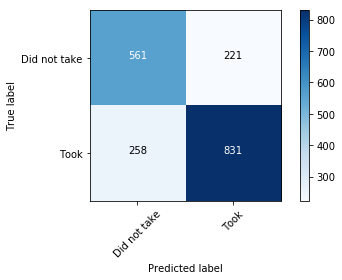

In [10]:
lrtest = lm.LogisticRegressionCV(Cs=np.exp(np.linspace(-5, -2, 301)), class_weight='balanced', solver='liblinear', random_state=0)

lrtest.fit(datatestpredstd, datatestresp)

print('C:', lrtest.C_[0])

modellrtest = str(lrtest.intercept_[0])
for i in range(len(lrtest.coef_[0])):
    if lrtest.coef_[0][i] > 0:
        modellrtest = modellrtest + ' + {} * {}'.format(lrtest.coef_[0][i], datatestpredstd.columns[i])
    if lrtest.coef_[0][i] < 0:
        modellrtest = modellrtest + ' - {} * {}'.format(abs(lrtest.coef_[0][i]), datatestpredstd.columns[i])
print('Odds of taking college entrance exam: \n'+'exp('+modellrtest+')')

print(metrics.classification_report(datatestresp, lrtest.predict(datatestpredstd)))

print('Matthews correlation coefficient:', metrics.matthews_corrcoef(datatestresp, lrtest.predict(datatestpredstd)))

cmlrtest = metrics.confusion_matrix(datatestresp, lrtest.predict(datatestpredstd))

plt.imshow(cmlrtest, interpolation='nearest', cmap=plt.cm.Blues)

thresh = cmlrtest.max() / 2.
for i, j in itertools.product(range(cmlrtest.shape[0]), range(cmlrtest.shape[1])):
    plt.text(j, i, cmlrtest[i, j], horizontalalignment='center', color='white' if cmlrtest[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
classes = ['Did not take', 'Took']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.colorbar()
plt.tight_layout()

plt.show()

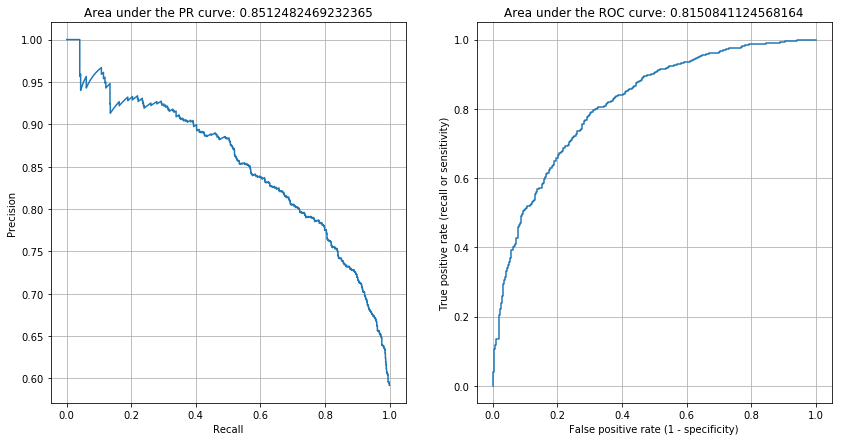

In [11]:
roc = metrics.roc_curve(datatestresp, lrtest.decision_function(datatestpredstd))
rocscore = metrics.roc_auc_score(datatestresp, lrtest.decision_function(datatestpredstd))
pr = metrics.precision_recall_curve(datatestresp, lrtest.decision_function(datatestpredstd))
prscore = metrics.average_precision_score(datatestresp, lrtest.decision_function(datatestpredstd))

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].plot(pr[1], pr[0])
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].grid()
ax[0].set_title('Area under the PR curve: {}'.format(prscore))

ax[1].plot(roc[0], roc[1])
ax[1].set_xlabel('False positive rate (1 - specificity)')
ax[1].set_ylabel('True positive rate (recall or sensitivity)')
ax[1].grid()
ax[1].set_title('Area under the ROC curve: {}'.format(rocscore))

plt.show()

The information above shows that college entrance exam status can be predicted from K–3 data fairly well. Now we split our observations into training and test sets to see how well this model generalizes to unseen data.

C: 0.0265161844089
Odds of taking college entrance exam: 
exp(0.0513892818221 + 0.48483486592564723 * female - 0.0333317136406384 * white + 0.11127230417885847 * black - 0.0265513087161055 * asian - 0.05694468521980956 * age - 0.1077490103330611 * yearssmall + 0.04312373131846623 * kinnercity + 0.0498210864144907 * ksuburban - 0.05989732094477876 * krural - 0.04260931150229836 * ktwhite - 0.012168800345127207 * gkthighdegree - 0.049999970856835094 * gktyears - 0.1754472057134719 * gkfreelunch - 0.040375762862141715 * gkabsent - 0.040881953332152374 * gktreadss + 0.0734979736669185 * gktmathss + 0.1619181986157484 * gktlstnss + 0.009355806288464556 * gktwordss + 0.046477652206513544 * 1innercity + 0.0464671655264433 * 1suburban - 0.07704609314828363 * 1rural + 0.05984785085192652 * 1twhite + 0.031355352309723965 * g1thighdegree - 0.16822149002671935 * g1tyears - 0.32114629306755893 * g1freelunch - 0.06867576693603734 * g1absent + 0.05546962822281788 * g1treadss - 0.08572837275436918 * g

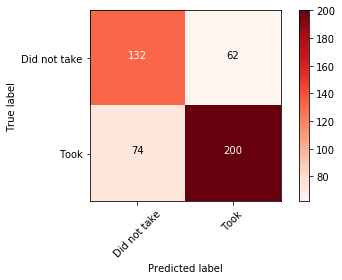

In [12]:
X_train_lrt, X_test_lrt, y_train_lrt, y_test_lrt = ms.train_test_split(datatestpred, datatestresp, test_size=0.25, random_state=0)

X_test_lrt = stdize_cont_var(X_train_lrt, X_test_lrt)

X_train_lrt = stdize_cont_var(X_train_lrt)

lrtesttt = lm.LogisticRegressionCV(Cs=np.exp(np.linspace(-5, -2, 301)), class_weight='balanced', solver='liblinear', random_state=0)

lrtesttt.fit(X_train_lrt, y_train_lrt)

print('C:', lrtesttt.C_[0])

modellrtesttt = str(lrtesttt.intercept_[0])
for i in range(len(lrtesttt.coef_[0])):
    if lrtesttt.coef_[0][i] > 0:
        modellrtesttt = modellrtesttt + ' + {} * {}'.format(lrtesttt.coef_[0][i], datatestpredstd.columns[i])
    if lrtesttt.coef_[0][i] < 0:
        modellrtesttt = modellrtesttt + ' - {} * {}'.format(abs(lrtesttt.coef_[0][i]), datatestpredstd.columns[i])
print('Odds of taking college entrance exam: \n'+'exp('+modellrtesttt+')')

print(metrics.classification_report(y_test_lrt, lrtesttt.predict(X_test_lrt)))

print('Matthews correlation coefficient:', metrics.matthews_corrcoef(y_test_lrt, lrtesttt.predict(X_test_lrt)))

cmlrtesttt = metrics.confusion_matrix(y_test_lrt, lrtesttt.predict(X_test_lrt))

plt.imshow(cmlrtesttt, interpolation='nearest', cmap=plt.cm.Reds)

thresh = cmlrtesttt.max() / 2.
for i, j in itertools.product(range(cmlrtesttt.shape[0]), range(cmlrtesttt.shape[1])):
    plt.text(j, i, cmlrtesttt[i, j], horizontalalignment='center', color='white' if cmlrtesttt[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
classes = ['Did not take', 'Took']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.colorbar()
plt.tight_layout()

plt.show()

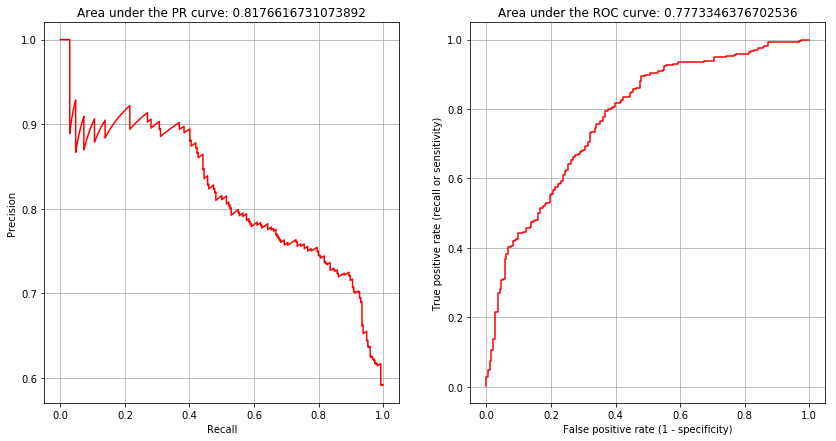

In [13]:
roc = metrics.roc_curve(y_test_lrt, lrtesttt.decision_function(X_test_lrt))
rocscore = metrics.roc_auc_score(y_test_lrt, lrtesttt.decision_function(X_test_lrt))
pr = metrics.precision_recall_curve(y_test_lrt, lrtesttt.decision_function(X_test_lrt))
prscore = metrics.average_precision_score(y_test_lrt, lrtesttt.decision_function(X_test_lrt))

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].plot(pr[1], pr[0], color='r')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].grid()
ax[0].set_title('Area under the PR curve: {}'.format(prscore))

ax[1].plot(roc[0], roc[1], color='r')
ax[1].set_xlabel('False positive rate (1 - specificity)')
ax[1].set_ylabel('True positive rate (recall or sensitivity)')
ax[1].grid()
ax[1].set_title('Area under the ROC curve: {}'.format(rocscore))

plt.show()

As expected, performance drops on unseen data. However, the predictive power of K–3 data on an outcome nearly a decade later is surprisingly strong.

Next, we predict high school graduation status from the same K–3 data. Again, we have to weight our classes so that the classifier is not biased toward the larger class.

C: 0.123687135817
Odds of graduation: 
exp(0.0 + 0.4240598215076813 * female - 0.13428274804285723 * age - 0.043725898942030626 * yearssmall + 0.11194091198081593 * krural + 0.28485975443621514 * ktwhite + 0.10179052759320563 * gkthighdegree - 0.004076547701078092 * gktyears - 0.09338075163552763 * gkfreelunch - 0.027576907071990436 * gkabsent + 0.018182775327951654 * gktwordss + 0.034033387897045915 * 1twhite - 0.01741179866004596 * g1thighdegree - 0.09651070696386402 * g1tyears - 0.8794184914072624 * g1freelunch + 0.06039621829847357 * g1tlstnss - 0.11246637394503488 * g1twordss + 0.15400132821679086 * g1readbsraw - 0.047988039319223345 * g2tyears - 0.06437078339031915 * g2freelunch + 0.012406186452697565 * g2tmathss + 0.024369697135516243 * g2tlstnss + 0.00796489405575219 * g2twordss + 0.03723431036011538 * g2readbsraw + 0.003659198975227576 * g2mathbsraw + 0.004567944687230001 * g3thighdegree - 0.10305213618735883 * g3freelunch - 0.2651374500040527 * g3absent + 0.14590587427608387 

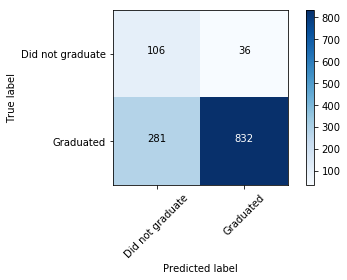

In [14]:
lrgrad = lm.LogisticRegressionCV(Cs=np.exp(np.linspace(-5, -2, 301)), class_weight='balanced', solver='liblinear', penalty='l1', random_state=0)

lrgrad.fit(datagradpredstd, datagradresp)

print('C:', lrgrad.C_[0])

modellrgrad = str(lrgrad.intercept_[0])
for i in range(len(lrgrad.coef_[0])):
    if lrgrad.coef_[0][i] > 0:
        modellrgrad = modellrgrad + ' + {} * {}'.format(lrgrad.coef_[0][i], datagradpredstd.columns[i])
    if lrgrad.coef_[0][i] < 0:
        modellrgrad = modellrgrad + ' - {} * {}'.format(abs(lrgrad.coef_[0][i]), datagradpredstd.columns[i])
print('Odds of graduation: \n'+'exp('+modellrgrad+')')

print(metrics.classification_report(datagradresp, lrgrad.predict(datagradpredstd)))

print('Matthews correlation coefficient:', metrics.matthews_corrcoef(datagradresp, lrgrad.predict(datagradpredstd)))

cmlrgrad = metrics.confusion_matrix(datagradresp, lrgrad.predict(datagradpredstd))

plt.imshow(cmlrgrad, interpolation='nearest', cmap=plt.cm.Blues)

thresh = cmlrgrad.max() / 2.
for i, j in itertools.product(range(cmlrgrad.shape[0]), range(cmlrgrad.shape[1])):
    plt.text(j, i, cmlrgrad[i, j], horizontalalignment='center', color='white' if cmlrgrad[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
classes = ['Did not graduate', 'Graduated']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.colorbar()
plt.tight_layout()

plt.show()

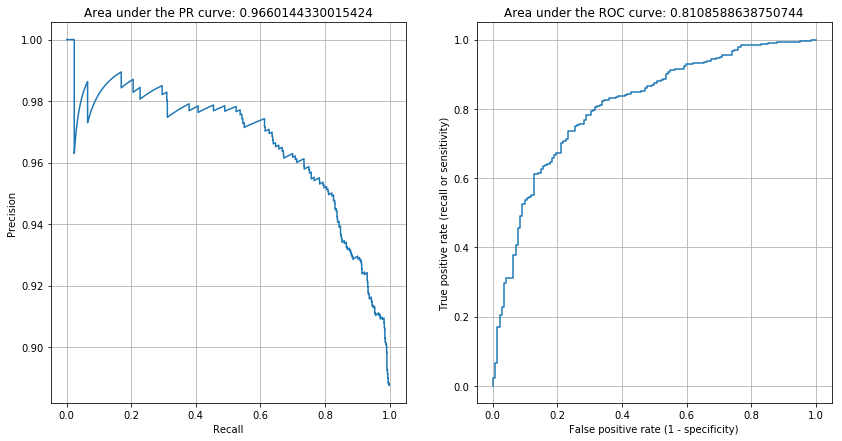

In [15]:
roc = metrics.roc_curve(datagradresp, lrgrad.decision_function(datagradpredstd))
rocscore = metrics.roc_auc_score(datagradresp, lrgrad.decision_function(datagradpredstd))
pr = metrics.precision_recall_curve(datagradresp, lrgrad.decision_function(datagradpredstd))
prscore = metrics.average_precision_score(datagradresp, lrgrad.decision_function(datagradpredstd))

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].plot(pr[1], pr[0])
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].grid()
ax[0].set_title('Area under the PR curve: {}'.format(prscore))

ax[1].plot(roc[0], roc[1])
ax[1].set_xlabel('False positive rate (1 - specificity)')
ax[1].set_ylabel('True positive rate (recall or sensitivity)')
ax[1].grid()
ax[1].set_title('Area under the ROC curve: {}'.format(rocscore))

plt.show()

We see that graduation status is not as easily predictable as college entrance exam status. To reduce overfitting, we impose an L1 penalty instead of the default L2 penalty. This reduces many of the coefficients to 0, which removes features from the model. We know from the previous sections that many of the coefficients are highly correlated with one another, so eliminating some features should not drastically reduce predictive power, although it will improve interpretability.

The last step in this section is to evaluate the model on an unseen test set.

C: 0.117654843022
Odds of graduation: 
exp(0.193897424122 + 0.39689741394144834 * female - 0.1856383693010824 * age + 0.0305903962919111 * ktwhite + 0.14911083676466222 * gkthighdegree - 0.13745957632730066 * gktyears - 0.09344882563010987 * gkfreelunch - 0.002419876731674446 * gkabsent - 0.11551006829727878 * g1tyears - 1.0828043888281134 * g1freelunch - 0.029824032734643312 * g1absent + 0.02163115085551952 * g1tlstnss - 0.049148525064739386 * g1twordss + 0.15777804384251395 * g1readbsraw - 0.05928810636787155 * g2tyears + 0.16977219348467204 * g2tlstnss - 0.093512026743394 * g3tyears - 0.25898363195060975 * g3absent + 0.23129125868501121 * g3treadss + 0.16842944254450307 * g3tmathss + 0.007566078043559596 * g3readbsraw + 0.10054483812363503 * g3mathbsraw)
             precision    recall  f1-score   support

        0.0       0.22      0.68      0.34        31
        1.0       0.95      0.74      0.83       283

avg / total       0.88      0.74      0.79       314

Matthews correlat

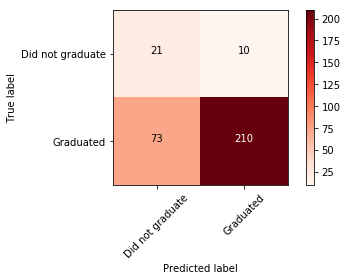

In [16]:
X_train_lrg, X_test_lrg, y_train_lrg, y_test_lrg = ms.train_test_split(datagradpred, datagradresp, test_size=0.25, random_state=0)

X_test_lrg = stdize_cont_var(X_train_lrg, X_test_lrg)

X_train_lrg = stdize_cont_var(X_train_lrg)

lrgradtt = lm.LogisticRegressionCV(Cs=np.exp(np.linspace(-5, -2, 301)), class_weight='balanced', solver='liblinear', penalty='l1', random_state=0)

lrgradtt.fit(X_train_lrg, y_train_lrg)

print('C:', lrgradtt.C_[0])

modellrgradtt = str(lrgradtt.intercept_[0])
for i in range(len(lrgradtt.coef_[0])):
    if lrgradtt.coef_[0][i] > 0:
        modellrgradtt = modellrgradtt + ' + {} * {}'.format(lrgradtt.coef_[0][i], datagradpredstd.columns[i])
    if lrgradtt.coef_[0][i] < 0:
        modellrgradtt = modellrgradtt + ' - {} * {}'.format(abs(lrgradtt.coef_[0][i]), datagradpredstd.columns[i])
print('Odds of graduation: \n'+'exp('+modellrgradtt+')')

print(metrics.classification_report(y_test_lrg, lrgradtt.predict(X_test_lrg)))

print('Matthews correlation coefficient:', metrics.matthews_corrcoef(y_test_lrg, lrgradtt.predict(X_test_lrg)))

cmlrgradtt = metrics.confusion_matrix(y_test_lrg, lrgradtt.predict(X_test_lrg))

plt.imshow(cmlrgradtt, interpolation='nearest', cmap=plt.cm.Reds)

thresh = cmlrgradtt.max() / 2.
for i, j in itertools.product(range(cmlrgradtt.shape[0]), range(cmlrgradtt.shape[1])):
    plt.text(j, i, cmlrgradtt[i, j], horizontalalignment='center', color='white' if cmlrgradtt[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
classes = ['Did not graduate', 'Graduated']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.colorbar()
plt.tight_layout()

plt.show()

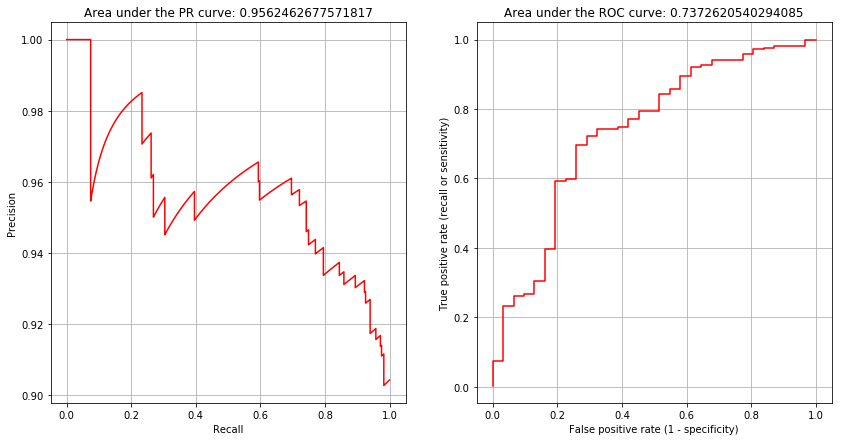

In [17]:
roc = metrics.roc_curve(y_test_lrg, lrgradtt.decision_function(X_test_lrg))
rocscore = metrics.roc_auc_score(y_test_lrg, lrgradtt.decision_function(X_test_lrg))
pr = metrics.precision_recall_curve(y_test_lrg, lrgradtt.decision_function(X_test_lrg))
prscore = metrics.average_precision_score(y_test_lrg, lrgradtt.decision_function(X_test_lrg))

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].plot(pr[1], pr[0], color='r')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].grid()
ax[0].set_title('Area under the PR curve: {}'.format(prscore))

ax[1].plot(roc[0], roc[1], color='r')
ax[1].set_xlabel('False positive rate (1 - specificity)')
ax[1].set_ylabel('True positive rate (recall or sensitivity)')
ax[1].grid()
ax[1].set_title('Area under the ROC curve: {}'.format(rocscore))

plt.show()

# Support vector classification

With support vector classification, we must tune the hyperparameters C and gamma. C determines how much slack we allow for the margin. Allowing more slack decreases variance but increases the bias of the model. We run cross-validation and average the Matthews correlation coefficients for a wide range of C values, ensuring that the optimal value is not near the endpoints of the interval. For gamma, in order to avoid a computationally expensive grid search which can result in errors for certain values, we manually try several values of gamma near the default value of $p^{-1}$, where $p$ is the number of features.

The values that achieve the greatest mean cross-validated score on the training set are then used on the test set.

In [18]:
C_values = np.exp(np.linspace(-4, 0.75, 30))

Maximum Matthews score: 0.42805384165026306 at C value 0.3493349279871261


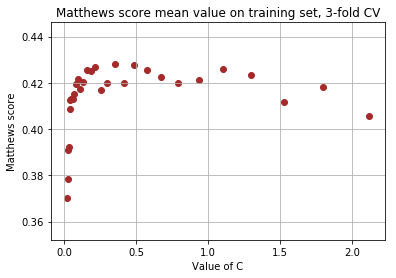

In [19]:
svy_t = np.zeros(len(C_values))

X_train_svt, X_test_svt, y_train_svt, y_test_svt = ms.train_test_split(datatestpred, datatestresp, test_size=0.25, random_state=0)

scaler_svttt = pp.StandardScaler().fit(X_train_svt)

for i in range(len(C_values)):
    s = svm.SVC(C=C_values[i], class_weight='balanced', random_state=0)  # best results with default gamma
    s.fit(scaler_svttt.transform(X_train_svt), y_train_svt)
    svy_t[i] = np.mean(ms.cross_val_score(s, scaler_svttt.transform(X_train_svt), y_train_svt, scoring=metrics.make_scorer(metrics.matthews_corrcoef)))

fig, ax = plt.subplots()

ax.scatter(C_values, svy_t, color='brown')
ax.set_xlabel('Value of C')
ax.set_ylabel('Matthews score')
ax.grid()
ax.set_title('Matthews score mean value on training set, 3-fold CV')

print('Maximum Matthews score: {} at C value {}'.format(max(svy_t), C_values[np.argmax(svy_t)]))

             precision    recall  f1-score   support

        0.0       0.64      0.70      0.67       194
        1.0       0.77      0.72      0.75       274

avg / total       0.72      0.71      0.72       468

Matthews correlation coefficient: 0.419280173767


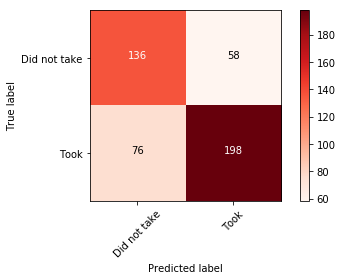

In [20]:
lsvtesttt = svm.SVC(C=C_values[np.argmax(svy_t)], class_weight='balanced', random_state=0)

lsvtesttt.fit(scaler_svttt.transform(X_train_svt), y_train_svt)

print(metrics.classification_report(y_test_svt, lsvtesttt.predict(scaler_svttt.transform(X_test_svt))))

print('Matthews correlation coefficient:', metrics.matthews_corrcoef(y_test_svt, lsvtesttt.predict(scaler_svttt.transform(X_test_svt))))

cmlsvtesttt = metrics.confusion_matrix(y_test_svt, lsvtesttt.predict(scaler_svttt.transform(X_test_svt)))

plt.imshow(cmlsvtesttt, interpolation='nearest', cmap=plt.cm.Reds)

thresh = cmlsvtesttt.max() / 2.
for i, j in itertools.product(range(cmlsvtesttt.shape[0]), range(cmlsvtesttt.shape[1])):
    plt.text(j, i, cmlsvtesttt[i, j], horizontalalignment='center', color='white' if cmlsvtesttt[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
classes = ['Did not take', 'Took']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.colorbar()
plt.tight_layout()

plt.show()

Compared to our logistic regression model, this model gets four more correct predictions in the "Did not take" group and two fewer correct predictions in the "Took" group. Overall, the Matthews score increases from 0.407 to 0.419.

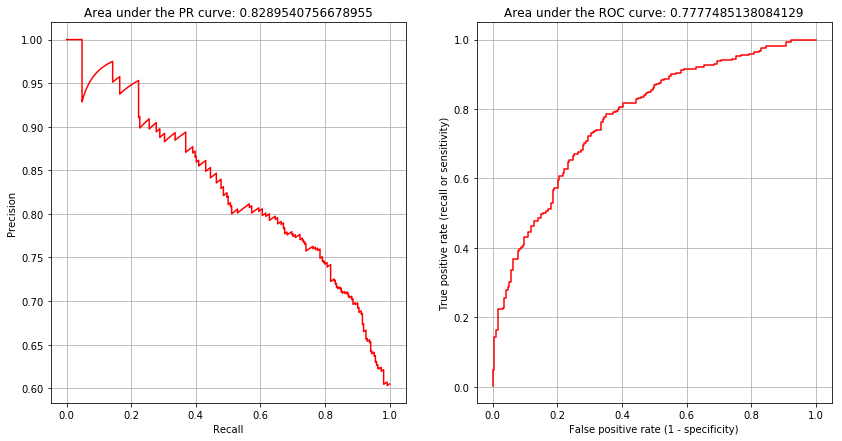

In [21]:
roc = metrics.roc_curve(y_test_svt, lsvtesttt.decision_function(scaler_svttt.transform(X_test_svt)))
rocscore = metrics.roc_auc_score(y_test_svt, lsvtesttt.decision_function(scaler_svttt.transform(X_test_svt)))
pr = metrics.precision_recall_curve(y_test_svt, lsvtesttt.decision_function(scaler_svttt.transform(X_test_svt)))
prscore = metrics.average_precision_score(y_test_svt, lsvtesttt.decision_function(scaler_svttt.transform(X_test_svt)))

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].plot(pr[1], pr[0], color='r')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].grid()
ax[0].set_title('Area under the PR curve: {}'.format(prscore))

ax[1].plot(roc[0], roc[1], color='r')
ax[1].set_xlabel('False positive rate (1 - specificity)')
ax[1].set_ylabel('True positive rate (recall or sensitivity)')
ax[1].grid()
ax[1].set_title('Area under the ROC curve: {}'.format(rocscore))

plt.show()

Maximum Matthews score: 0.2659534226597167 at C value 0.09422507295954784


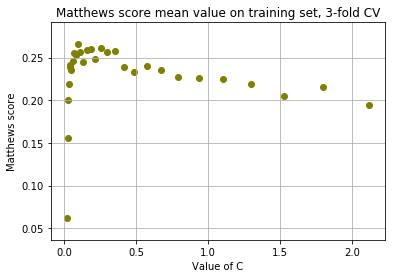

In [22]:
svy_g = np.zeros(len(C_values))

X_train_svg, X_test_svg, y_train_svg, y_test_svg = ms.train_test_split(datagradpred, datagradresp, test_size=0.25, random_state=0)

scaler_svgtt = pp.StandardScaler().fit(X_train_svg)

for i in range(len(C_values)):
    s = svm.SVC(C=C_values[i], class_weight='balanced', gamma=np.exp(-4), random_state=0)
    s.fit(scaler_svgtt.transform(X_train_svg), y_train_svg)
    svy_g[i] = np.mean(ms.cross_val_score(s, scaler_svgtt.transform(X_train_svg), y_train_svg, scoring=metrics.make_scorer(metrics.matthews_corrcoef)))

fig, ax = plt.subplots()

ax.scatter(C_values, svy_g, color='olive')
ax.set_xlabel('Value of C')
ax.set_ylabel('Matthews score')
ax.grid()
ax.set_title('Matthews score mean value on training set, 3-fold CV')

print('Maximum Matthews score: {} at C value {}'.format(max(svy_g), C_values[np.argmax(svy_g)]))

             precision    recall  f1-score   support

        0.0       0.21      0.84      0.33        31
        1.0       0.97      0.65      0.78       283

avg / total       0.90      0.67      0.74       314

Matthews correlation coefficient: 0.297917539836


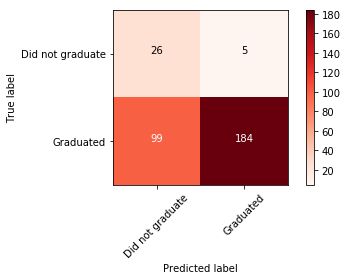

In [23]:
lsvgradtt = svm.SVC(C=C_values[np.argmax(svy_g)], class_weight='balanced', gamma=np.exp(-4), random_state=0)

lsvgradtt.fit(scaler_svgtt.transform(X_train_svg), y_train_svg)

print(metrics.classification_report(y_test_svg, lsvgradtt.predict(scaler_svgtt.transform(X_test_svg))))

print('Matthews correlation coefficient:', metrics.matthews_corrcoef(y_test_svg, lsvgradtt.predict(scaler_svgtt.transform(X_test_svg))))

cmlsvgradtt = metrics.confusion_matrix(y_test_svg, lsvgradtt.predict(scaler_svgtt.transform(X_test_svg)))

plt.imshow(cmlsvgradtt, interpolation='nearest', cmap=plt.cm.Reds)

thresh = cmlsvgradtt.max() / 2.
for i, j in itertools.product(range(cmlsvgradtt.shape[0]), range(cmlsvgradtt.shape[1])):
    plt.text(j, i, cmlsvgradtt[i, j], horizontalalignment='center', color='white' if cmlsvgradtt[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
classes = ['Did not graduate', 'Graduated']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.colorbar()
plt.tight_layout()

plt.show()

Again, graduation status proves more difficult to predict than exam status. For this problem, our support vector model makes five more correct predictions in the "Did not graduate" group and 26 fewer correct predictions in the "Graduated" group. The Matthews score increases from 0.273 to 0.298.

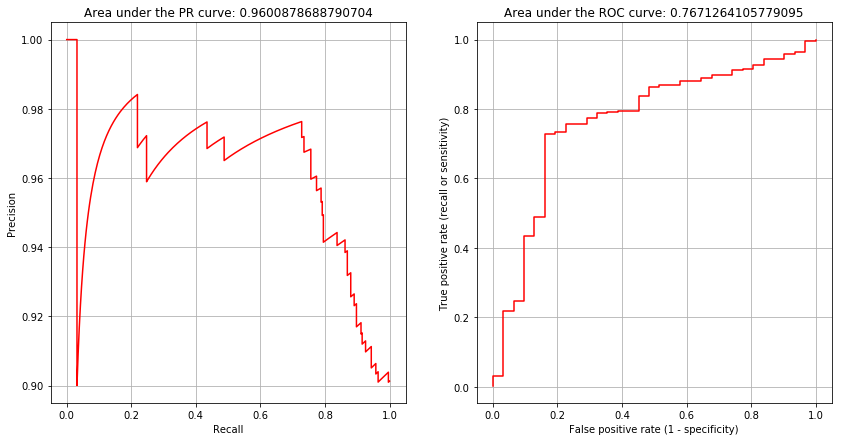

In [24]:
roc = metrics.roc_curve(y_test_svg, lsvgradtt.decision_function(scaler_svgtt.transform(X_test_svg)))
rocscore = metrics.roc_auc_score(y_test_svg, lsvgradtt.decision_function(scaler_svgtt.transform(X_test_svg)))
pr = metrics.precision_recall_curve(y_test_svg, lsvgradtt.decision_function(scaler_svgtt.transform(X_test_svg)))
prscore = metrics.average_precision_score(y_test_svg, lsvgradtt.decision_function(scaler_svgtt.transform(X_test_svg)))

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].plot(pr[1], pr[0], color='r')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].grid()
ax[0].set_title('Area under the PR curve: {}'.format(prscore))

ax[1].plot(roc[0], roc[1], color='r')
ax[1].set_xlabel('False positive rate (1 - specificity)')
ax[1].set_ylabel('True positive rate (recall or sensitivity)')
ax[1].grid()
ax[1].set_title('Area under the ROC curve: {}'.format(rocscore))

plt.show()

# Averaging two classifiers

Now we attempt to average the two classifiers examined above, logistic regression and support vector classification. We saw that support vectors performed better on the first problem while logistic regression performed better on the second. We use the "decision_function" method of each classifier to obtain the signed distance to the separating hyperplane for each observation in the training set. To ensure that the distances are on the same scale, we divide the distances by the standard deviation of each set. We **do not center around the mean** because the signs of the distances determine the classification of each observation.

We then apply a weight coefficient $w$ in the interval $[0, 1]$ to the scaled distances from the logistic regression classifier and $1-w$ to the scaled distances from the support vector classifier to obtain weighted averages of the two distances. The sign of each weighted average is used to determine the final classification of the observation. The Matthews score on the training set is plotted for the whole range of $w$ values. The weight that achieves the highest Matthews score on the training set is then applied to the test set.

Maximum score of 0.5368721521962755 achieved at weight 0.155 for logistic regression classifier.


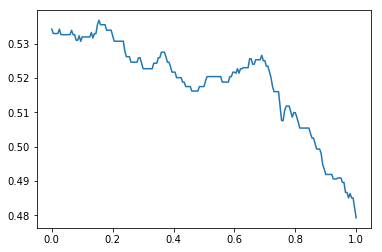

In [25]:
dft_lr = lrtesttt.decision_function(X_train_lrt)/lrtesttt.decision_function(X_train_lrt).std()
dft_sv = lsvtesttt.decision_function(scaler_svttt.transform(X_train_svt))/lsvtesttt.decision_function(scaler_svttt.transform(X_train_svt)).std()

preds_tw = lrtesttt.predict(X_train_lrt).copy()

weights_t, scores_t = np.linspace(0, 1, 201), np.linspace(0, 1, 201)

for i in range(len(weights_t)):
    w1 = weights_t[i]
    dft_w = (w1 * dft_lr + (1 - w1) * dft_sv)
    for j in range(len(dft_w)):
        if dft_w[j] < 0:
            preds_tw[j] = 0
        else:
            preds_tw[j] = 1
    scores_t[i] = metrics.matthews_corrcoef(y_train_lrt, preds_tw)

wt_index = np.argmax(scores_t)
print('Maximum score of {} achieved at weight {} for logistic regression classifier.'.format(scores_t[wt_index], weights_t[wt_index]))

plt.plot(weights_t, scores_t)
plt.show()

             precision    recall  f1-score   support

        0.0       0.64      0.70      0.67       194
        1.0       0.77      0.73      0.75       274

avg / total       0.72      0.72      0.72       468

Matthews correlation coefficient: 0.423067521043


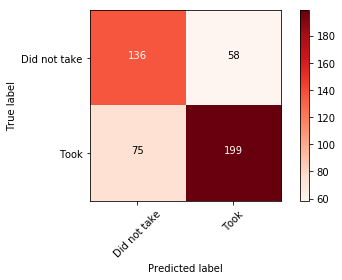

In [26]:
dft_lr_final = lrtesttt.decision_function(X_test_lrt)/lrtesttt.decision_function(X_test_lrt).std()
dft_sv_final = lsvtesttt.decision_function(scaler_svttt.transform(X_test_svt))/lsvtesttt.decision_function(scaler_svttt.transform(X_test_svt)).std()

dft_final = (weights_t[wt_index] * dft_lr_final + (1 - weights_t[wt_index]) * dft_sv_final)
preds_t_final = lrtesttt.predict(X_test_lrt).copy()

for k in range(len(dft_final)):
    if dft_final[k] < 0:
        preds_t_final[k] = 0
    else:
        preds_t_final[k] = 1

print(metrics.classification_report(y_test_lrt, preds_t_final))

print('Matthews correlation coefficient:', metrics.matthews_corrcoef(y_test_lrt, preds_t_final))

cmtavg = metrics.confusion_matrix(y_test_lrt, preds_t_final)

plt.imshow(cmtavg, interpolation='nearest', cmap=plt.cm.Reds)

thresh = cmtavg.max() / 2.
for i, j in itertools.product(range(cmtavg.shape[0]), range(cmtavg.shape[1])):
    plt.text(j, i, cmtavg[i, j], horizontalalignment='center', color='white' if cmtavg[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
tick_marks = range(len(classes))
classes = ['Did not take', 'Took']
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.colorbar()
plt.tight_layout()

plt.show()

In this case, the weighted average of the two classifiers performs better on the test set than either classifier individually. The Matthews score is 0.423, an improvement over the support vector classification (0.419) and logistic regression (0.407).

Maximum score of 0.3779616427228391 achieved at weight 0.665 for logistic regression classifier.


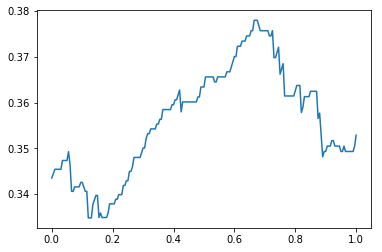

In [27]:
dfg_lr = lrgradtt.decision_function(X_train_lrg)/lrgradtt.decision_function(X_train_lrg).std()
dfg_sv = lsvgradtt.decision_function(scaler_svgtt.transform(X_train_svg))/lsvgradtt.decision_function(scaler_svgtt.transform(X_train_svg)).std()

preds_gw = lrgradtt.predict(X_train_lrg).copy()

weights_g, scores_g = np.linspace(0, 1, 201), np.linspace(0, 1, 201)

for i in range(len(weights_g)):
    w2 = weights_g[i]
    dfg_w = (w2 * dfg_lr + (1 - w2) * dfg_sv)
    for j in range(len(dfg_w)):
        if dfg_w[j] < 0:
            preds_gw[j] = 0
        else:
            preds_gw[j] = 1
    scores_g[i] = metrics.matthews_corrcoef(y_train_lrg, preds_gw)

wg_index = np.argmax(scores_g)
print('Maximum score of {} achieved at weight {} for logistic regression classifier.'.format(scores_g[wg_index], weights_g[wg_index]))

plt.plot(weights_g, scores_g)
plt.show()

             precision    recall  f1-score   support

        0.0       0.22      0.71      0.33        31
        1.0       0.96      0.72      0.82       283

avg / total       0.88      0.72      0.77       314

Matthews correlation coefficient: 0.271972937523


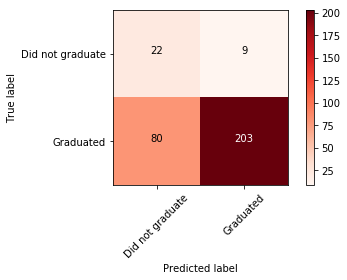

In [28]:
dfg_lr_final = lrgradtt.decision_function(X_test_lrg)/lrgradtt.decision_function(X_test_lrg).std()
dfg_sv_final = lsvgradtt.decision_function(scaler_svgtt.transform(X_test_svg))/lsvgradtt.decision_function(scaler_svgtt.transform(X_test_svg)).std()

dfg_final = (weights_g[wg_index] * dfg_lr_final + (1 - weights_g[wg_index]) * dfg_sv_final)
preds_g_final = lrgradtt.predict(X_test_lrg).copy()

for k in range(len(dfg_final)):
    if dfg_final[k] < 0:
        preds_g_final[k] = 0
    else:
        preds_g_final[k] = 1

print(metrics.classification_report(y_test_lrg, preds_g_final))

print('Matthews correlation coefficient:', metrics.matthews_corrcoef(y_test_lrg, preds_g_final))

cmgavg = metrics.confusion_matrix(y_test_lrg, preds_g_final)

plt.imshow(cmgavg, interpolation='nearest', cmap=plt.cm.Reds)

thresh = cmgavg.max() / 2.
for i, j in itertools.product(range(cmgavg.shape[0]), range(cmgavg.shape[1])):
    plt.text(j, i, cmgavg[i, j], horizontalalignment='center', color='white' if cmgavg[i, j] > thresh else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
tick_marks = range(len(classes))
classes = ['Did not graduate', 'Graduated']
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.colorbar()
plt.tight_layout()

plt.show()

In this case, the weighted average of the two classifiers performs worse on the test set than either classifier. However, since the classes are heavily unbalanced, a single change in the smaller class makes a large difference in the Matthews score.